# Data Cleaning (Abby)

- X Dropping missing vals 
- X Converting fire/no fire to 0 and 1 
- X Converting columns to appropriate data types 
- X Converting region to 1 or 2? 
- XCreating test and training data sets

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
import warnings
import itertools
import time
warnings.filterwarnings('ignore')

data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

df = data.copy()
#dropping missing vals
df.dropna(inplace=True)

# dropping a row that was just for labelling
df = df.drop(index=123,axis=0)

# fixing index 
df.reset_index(inplace=True)

In [3]:
# Region 1 and 2
# Region 1 is Bejaia and Region 2 is Sidi Bel-Abbes 
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [4]:
# getting rid of column names weird spacing
df.columns=df.columns.str.strip()
df.columns 

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
#Converting Not fire/Fire (with unnecessary spacing) to 0 and 1
print(df['Classes'].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [6]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [7]:
df['Classes'] = df['Classes'].replace('not fire', 0)
df['Classes'] = df['Classes'].replace('fire', 1)
df.Classes.unique()

array([0, 1])

In [8]:
# converting column data types
df['DC']=df['DC'].astype('float')
df['ISI']=df['ISI'].astype('float')
df['BUI']=df['BUI'].astype('float')
df['FWI']=df['FWI'].astype('float')
df['day']=df['day'].astype('int')
df['month']=df['month'].astype('int')
df['year']=df['year'].astype('int')
df['Temperature']=df['Temperature'].astype('int')
df['RH']=df['RH'].astype('int')
df['Ws']=df['Ws'].astype('int')
df['Rain']=df['Rain'].astype('float')
df['FFMC']=df['FFMC'].astype('float')
df['DMC']=df['DMC'].astype('float')
df

index  day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  \
0        0    1      6  2012           29  57  18   0.0  65.7   3.4   7.6   
1        1    2      6  2012           29  61  13   1.3  64.4   4.1   7.6   
2        2    3      6  2012           26  82  22  13.1  47.1   2.5   7.1   
3        3    4      6  2012           25  89  13   2.5  28.6   1.3   6.9   
4        4    5      6  2012           27  77  16   0.0  64.8   3.0  14.2   
..     ...  ...    ...   ...          ...  ..  ..   ...   ...   ...   ...   
238    241   26      9  2012           30  65  14   0.0  85.4  16.0  44.5   
239    242   27      9  2012           28  87  15   4.4  41.1   6.5   8.0   
240    243   28      9  2012           27  87  29   0.5  45.9   3.5   7.9   
241    244   29      9  2012           24  54  18   0.1  79.7   4.3  15.2   
242    245   30      9  2012           24  64  15   0.2  67.3   3.8  16.5   

     ISI   BUI  FWI  Classes  Region  
0    1.3   3.4  0.5        0       1  
1    1.0   3.9  0.4        0       1  
2    0.3   2.7  0.1        0       1  
3    0.0   1.7  0.0        0       1  
4    1.2   3.9  0.5        0       1  
..   ...   ...  ...      ...     ...  
238  4.5  16.9  6.5        1       2  
239  0.1   6.2  0.0        0       2  
240  0.4   3.4  0.2        0       2  
241  1.7   5.1  0.7        0       2  
242  1.2   4.8  0.5        0       2  

[243 rows x 16 columns]

In [9]:
df.dtypes

index            int64
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [10]:
# No null values :)
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
# No duplicates :)
df.duplicated().sum()

0

In [12]:
from sklearn.model_selection import train_test_split

#Creating training and test datasets
np.random.seed(2)
train = df.sample(round(df.shape[0]*0.7))
test = df.drop(train.index)

In [13]:
df.isna().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# Exploratory Data Analysis (Mel, Abby)

- heatmaps
- pairplots
- pie chart/barplot of fire vs no fire breakdown
- density plots of different vars
- (other stuff)

In [81]:
##Currently doing EDA solely on the entire data-- but I can separate into test/train if needed.
##the current test/train dataframes have many more columns

In [82]:
df.shape

(243, 16)

In [83]:
train.shape

(170, 16)

In [84]:
test.shape

(73, 16)

In [85]:
# Classes is the variable we're looking for. 0 - no fire // 1 - fire
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

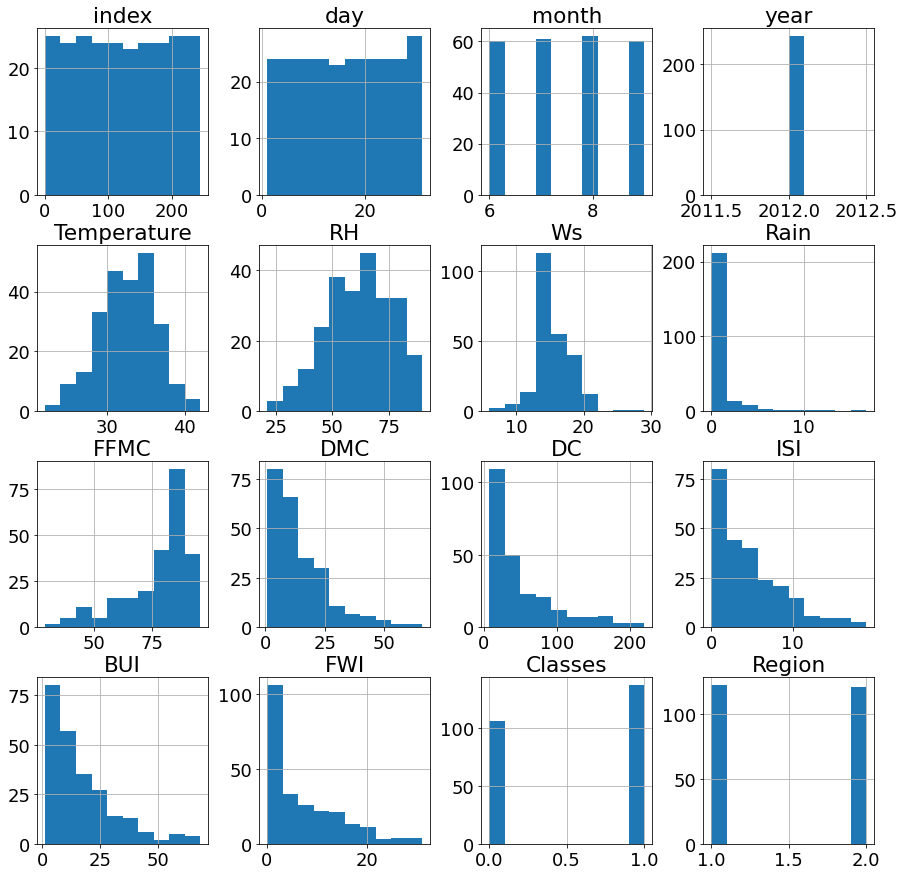

In [86]:
df.hist(figsize = (15,15))
plt.show()

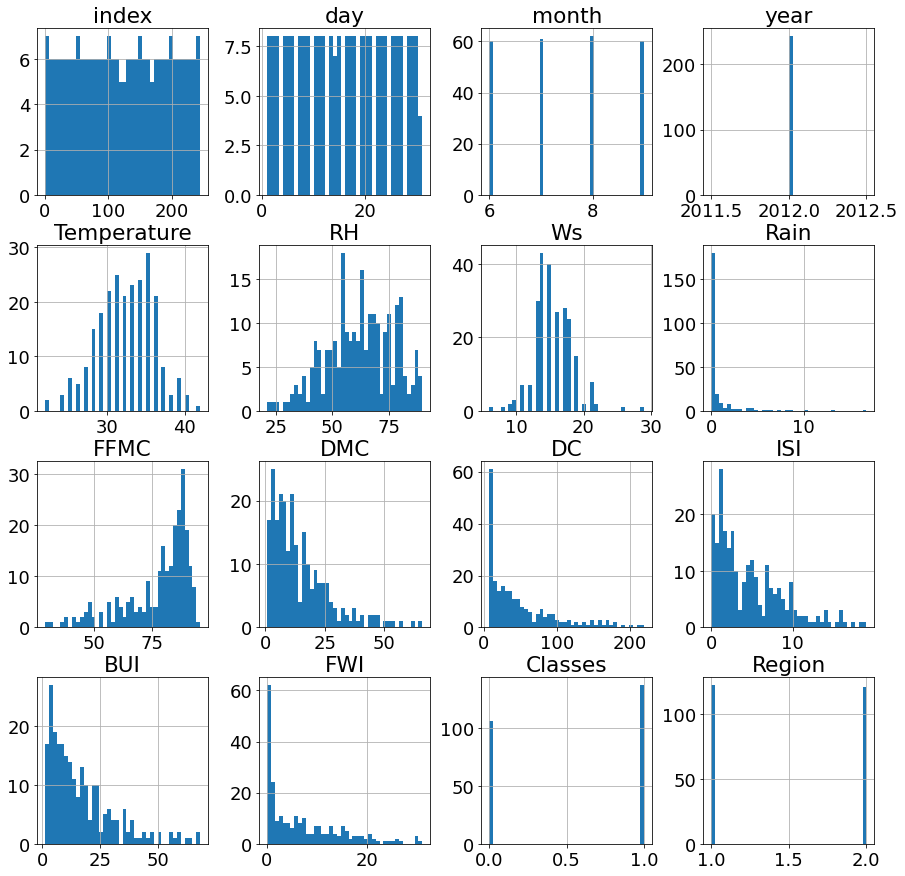

In [87]:
#same as above but with better binning

df.hist(figsize = (15,15), bins= 40)
plt.show()

In [88]:
df.describe()

index         day       month    year  Temperature          RH  \
count  243.000000  243.000000  243.000000   243.0   243.000000  243.000000   
mean   122.316872   15.761317    7.502058  2012.0    32.152263   62.041152   
std     71.540562    8.842552    1.114793     0.0     3.628039   14.828160   
min      0.000000    1.000000    6.000000  2012.0    22.000000   21.000000   
25%     60.500000    8.000000    7.000000  2012.0    30.000000   52.500000   
50%    121.000000   16.000000    8.000000  2012.0    32.000000   63.000000   
75%    184.500000   23.000000    8.000000  2012.0    35.000000   73.500000   
max    245.000000   31.000000    9.000000  2012.0    42.000000   90.000000   

               Ws        Rain        FFMC         DMC          DC         ISI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean    15.493827    0.762963   77.842387   14.680658   49.430864    4.742387   
std      2.811385    2.003207   14.349641   12.393040   47.665606    4.154234   
min      6.000000    0.000000   28.600000    0.700000    6.900000    0.000000   
25%     14.000000    0.000000   71.850000    5.800000   12.350000    1.400000   
50%     15.000000    0.000000   83.300000   11.300000   33.100000    3.500000   
75%     17.000000    0.500000   88.300000   20.800000   69.100000    7.250000   
max     29.000000   16.800000   96.000000   65.900000  220.400000   19.000000   

              BUI         FWI     Classes      Region  
count  243.000000  243.000000  243.000000  243.000000  
mean    16.690535    7.035391    0.563786    1.497942  
std     14.228421    7.440568    0.496938    0.501028  
min      1.100000    0.000000    0.000000    1.000000  
25%      6.000000    0.700000    0.000000    1.000000  
50%     12.400000    4.200000    1.000000    1.000000  
75%     22.650000   11.450000    1.000000    2.000000  
max     68.000000   31.100000    1.000000    2.000000

In [89]:
# for col in data.select_dtypes(include = float64):
#     if data[col].nunique() 

<AxesSubplot:>

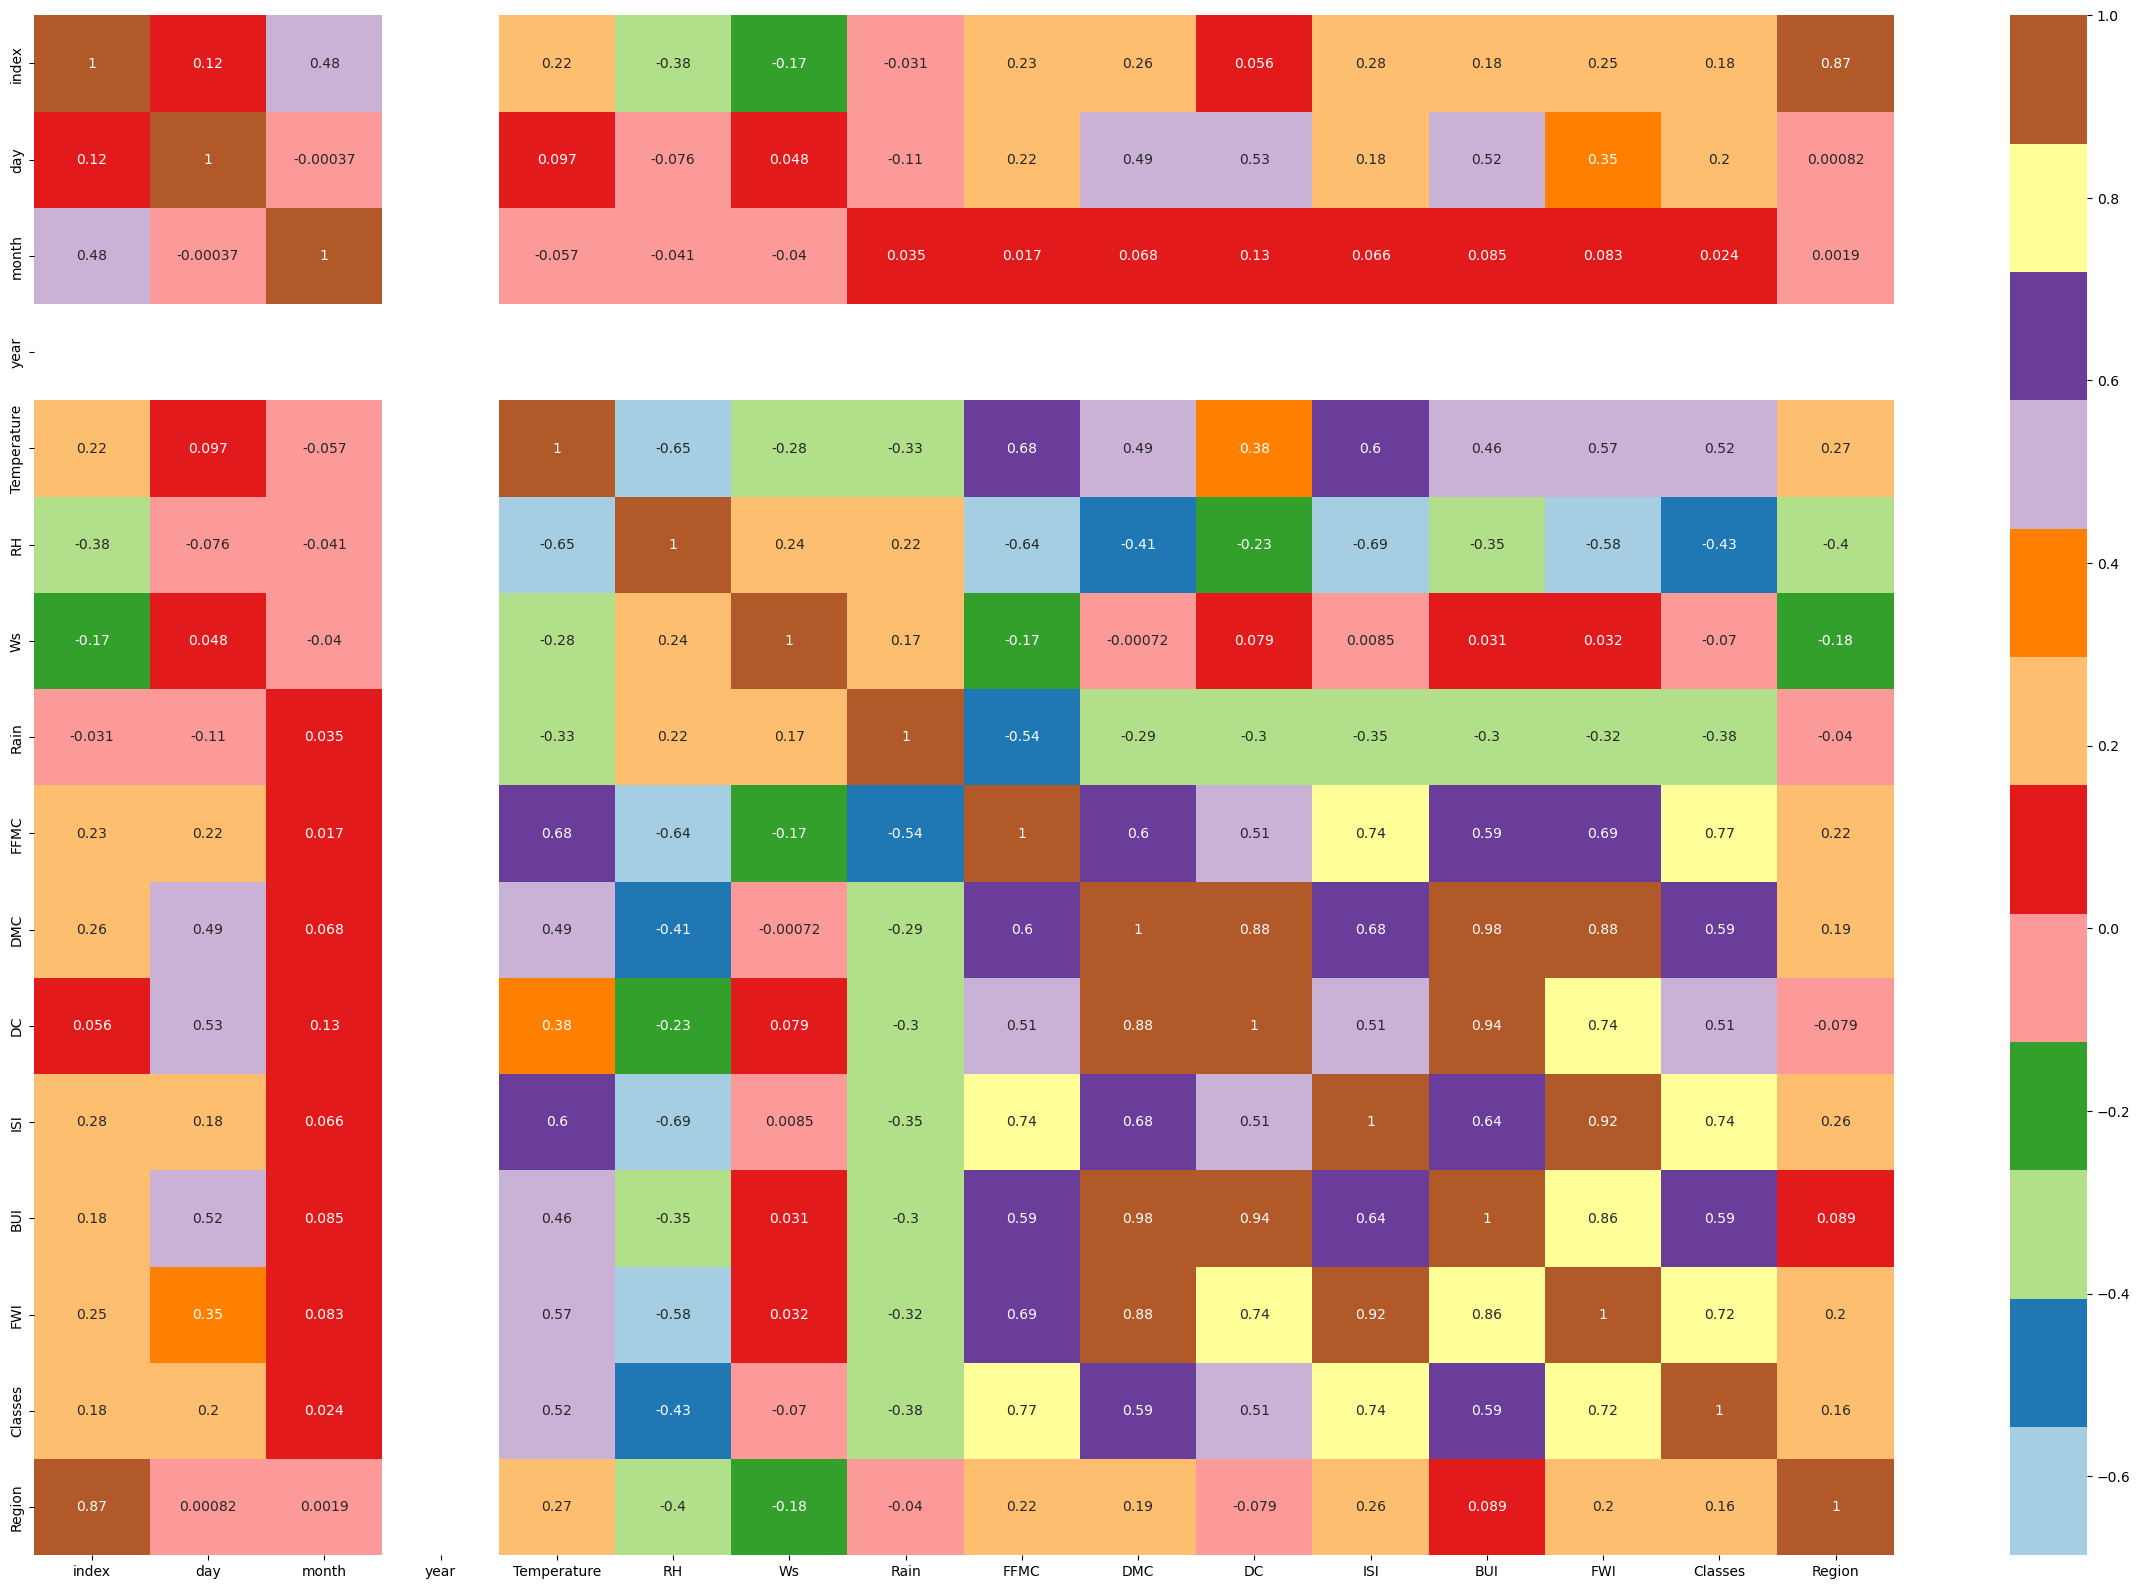

In [14]:
plt.figure(figsize = (30,20))
sns.heatmap(data = df.corr(), cmap = "Paired", cbar = True, annot = True)

In [15]:
fire_counts_df = df.Classes.value_counts()

In [16]:
fire_counts_test = test.Classes.value_counts()

In [17]:
fire_counts_train = train.Classes.value_counts()

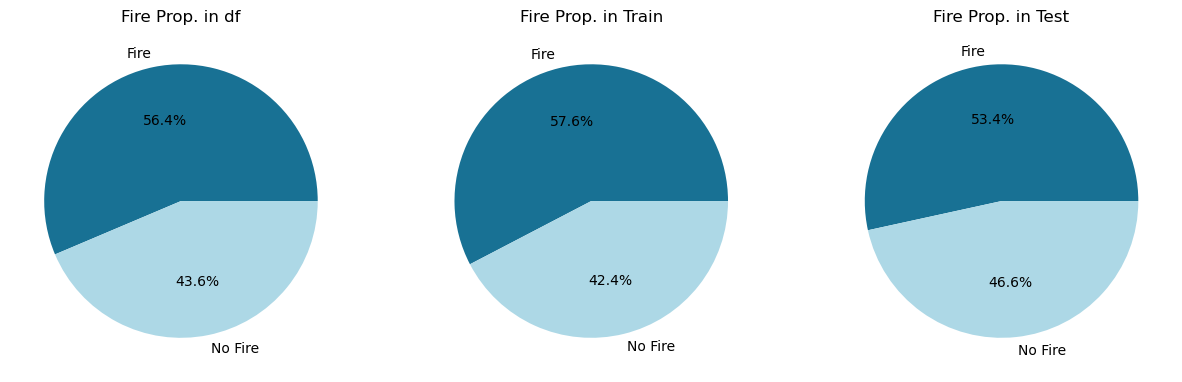

In [18]:
labels = ["Fire", "No Fire"]
fig = plt.figure(figsize = (15,15))
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(fire_counts_df, labels = labels, autopct= '%.1f%%', colors = ("#187194", "lightblue"))
plt.title("Fire Prop. in df")
ax2 = plt.subplot2grid((1,3),(0,1))
plt.pie(fire_counts_train, labels = labels, autopct= '%.1f%%', colors = ("#187194", "lightblue"))
plt.title("Fire Prop. in Train")
ax3 = plt.subplot2grid((1,3),(0,2))
plt.pie(fire_counts_test, labels = labels, autopct= '%.1f%%', colors = ("#187194", "lightblue"))
plt.title("Fire Prop. in Test")
plt.show()

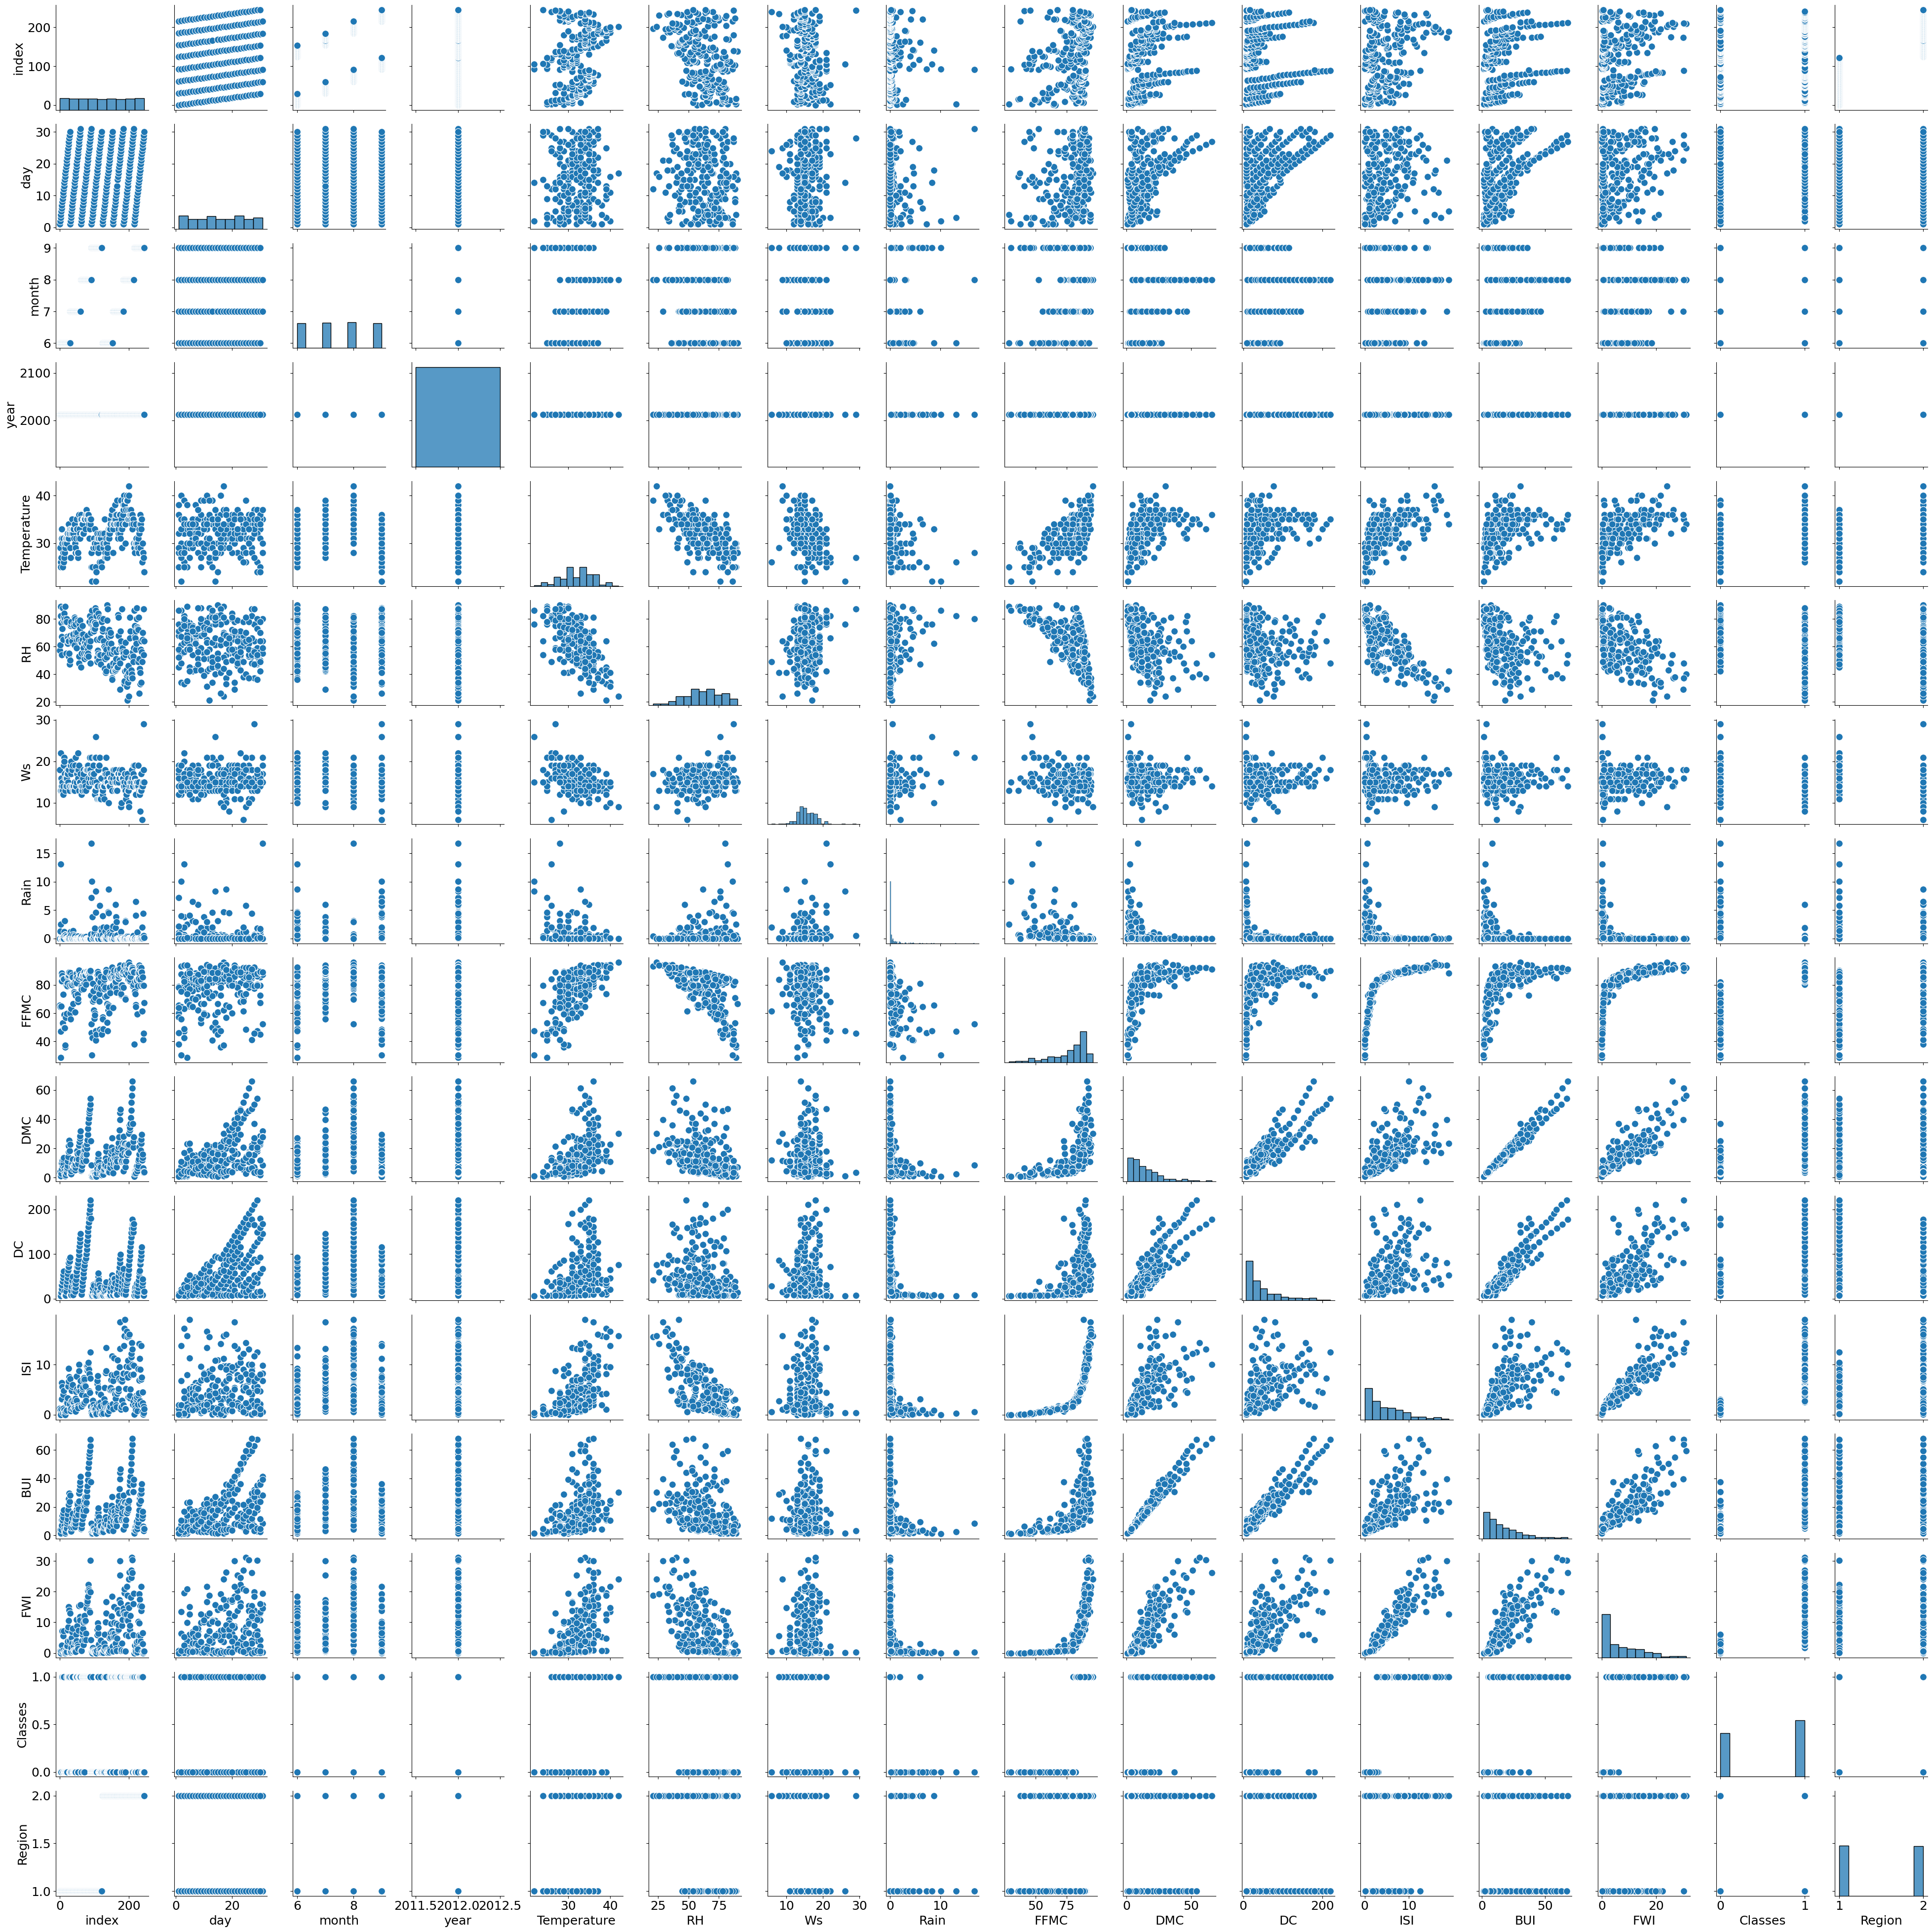

In [59]:
sns.pairplot(df)
plt.show()

# Logistic Regression Model Building (Arush, Mel)

- VIF for collinearity
- Use heatmaps/pairplots in EDA section
- Variable Selection Algorithms
- See if we need transformations by visualizing lineplots of response vs diff vairables
- building/printing model summary

In [19]:
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
     
    # predict the values
    pred_values = model.predict(data) # these will be probabilities
    
    # pred_values = np.abs(pred_values)
    pred_values = pred_values.apply(lambda x: 0 if x < 0 else x)
    pred_values = pred_values.apply(lambda x: 1 if x > 1 else x)
    
    # Specify bins to do the cutoff thing
    bins = np.array([0, cutoff, 1])
    
    # Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    
    precision = (cm[1,1])/(cm[1,1]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1]) # Recall
    
    # fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    # auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    # print("ROC-AUC = {:.1%}".format(auc_value))

In [20]:
# VIF test
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

        feature         VIF
0           day    1.548816
1         month    1.120089
2          year  482.030547
3   Temperature    2.347870
4            RH    2.785183
5            Ws    1.301353
6          Rain    1.565911
7          FFMC    4.986148
8           DMC   66.721558
9            DC   21.300967
10          ISI   53.888193
11          BUI  155.066601
12          FWI   93.763546


## Variable Selection

### Normal Forward Stepwise Selection

In [21]:
# Forward Stepwise Selection 

# Defining helpers

X = train[['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']]

def processSubset(predictor_subset):
    model = smf.ols('Classes~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model


def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best


def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    plt.subplot(2, 2, 1)

    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')


    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [22]:
models_best = forward_selection()

Processed  10 models on 1 predictors in 0.03984785079956055 seconds.
Processed  9 models on 2 predictors in 0.02898097038269043 seconds.
Processed  8 models on 3 predictors in 0.024749040603637695 seconds.
Processed  7 models on 4 predictors in 0.023808002471923828 seconds.
Processed  6 models on 5 predictors in 0.023640155792236328 seconds.
Processed  5 models on 6 predictors in 0.0239410400390625 seconds.
Processed  4 models on 7 predictors in 0.01949596405029297 seconds.
Processed  3 models on 8 predictors in 0.015608072280883789 seconds.
Processed  2 models on 9 predictors in 0.011429071426391602 seconds.
Processed  1 models on 10 predictors in 0.007130861282348633 seconds.
Total elapsed time: 0.22905802726745605 seconds.


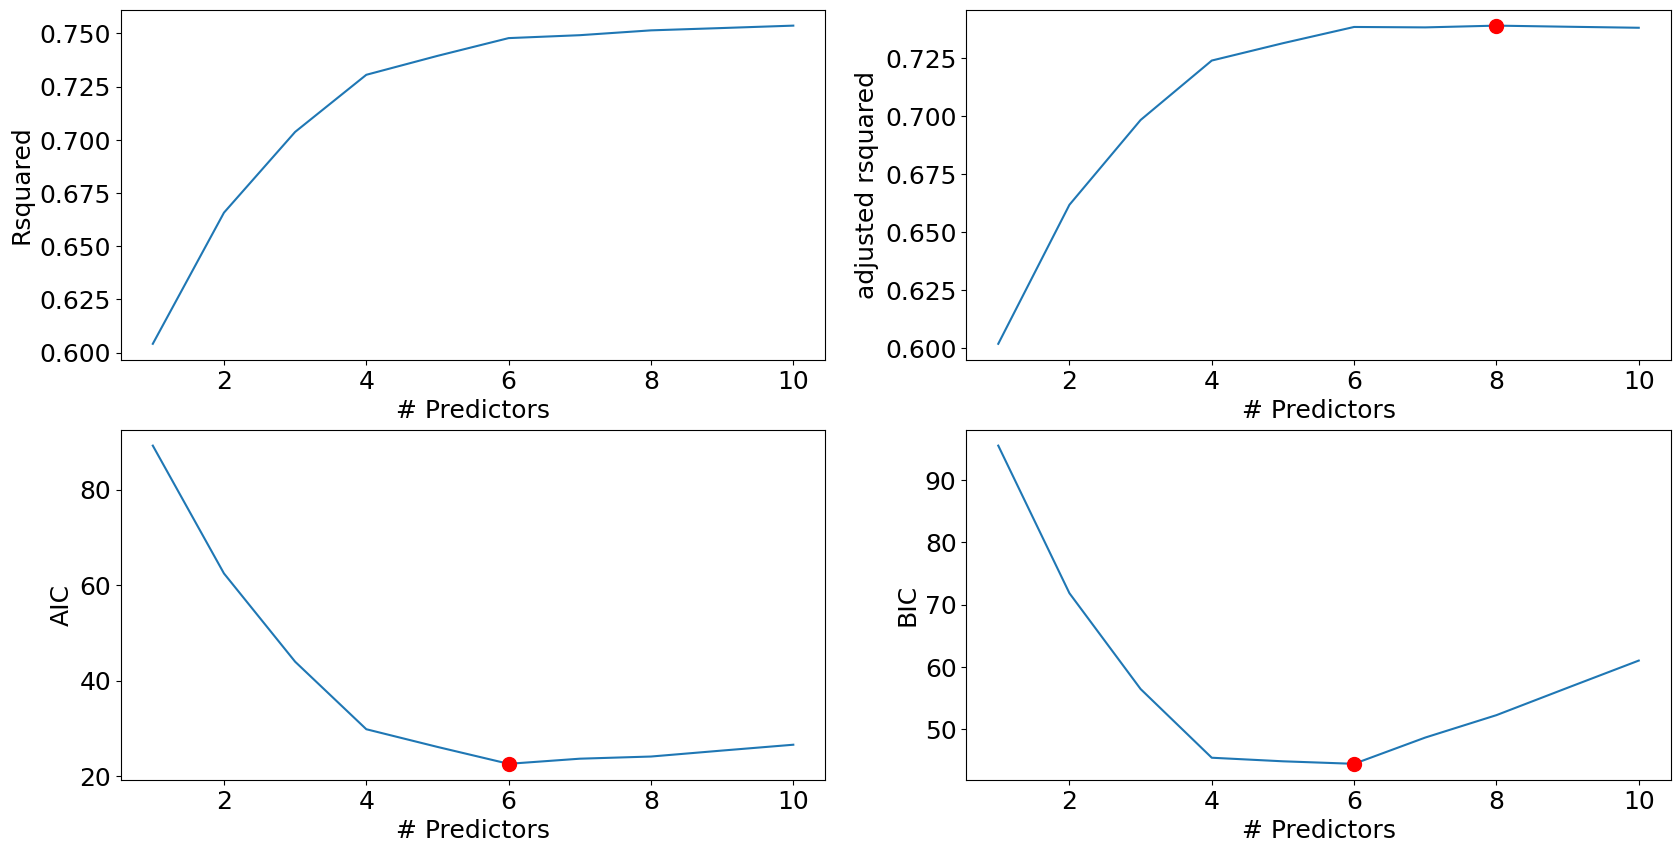

In [23]:
best_sub_plots()

In [24]:
# Finding the best model

best_subset_model_no_interaction = models_best.loc[6,'model']
models_best.loc[6,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     80.56
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.37e-46
Time:                        19:18:22   Log-Likelihood:                -4.2746
No. Observations:                 170   AIC:                             22.55
Df Residuals:                     163   BIC:                             44.50
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2658      0.274     -8.267      0.000      -2.807      -1.725
FFMC           0.0271      0.002     11.131      0.000       0.022       0.032
FWI            0.0499      0.006      7.952      0.000       0.038       0.062
RH             0.0144      0.002      7.009      0.000       0.010       0.018
BUI           -0.0125      0.003     -4.489      0.000      -0.018      -0.007
Ws            -0.0220      0.008     -2.705      0.008      -0.038      -0.006
Rain           0.0258      0.011      2.323      0.021       0.004       0.048
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.243
Skew:                           0.025   Prob(JB):                        0.537
Kurtosis:                       3.416   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 89.4%
Precision = 84.5%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 25.0%


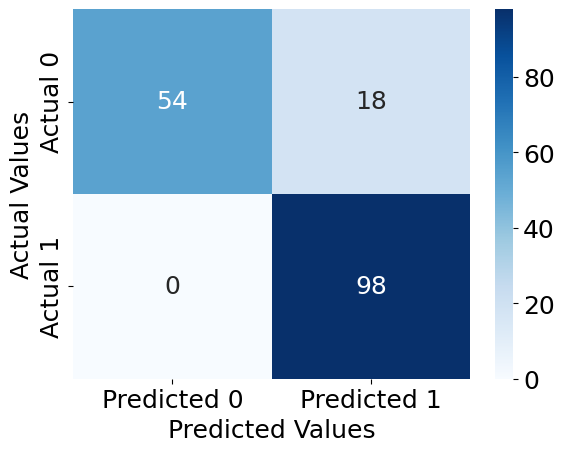

In [25]:
confusion_matrix_data(train, train.Classes, best_subset_model_no_interaction, 0.3)

Classification accuracy = 82.2%
Precision = 76.0%
TPR or Recall = 97.4%
FNR = 2.6%
FPR = 35.3%


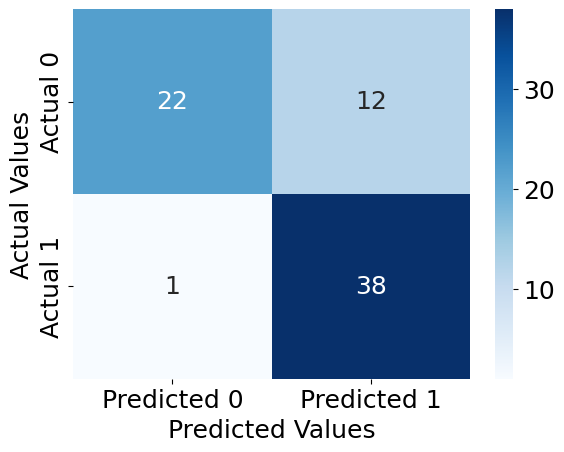

In [26]:
confusion_matrix_data(test, test.Classes, best_subset_model_no_interaction, 0.3)

### Forward stepwise with all interaction terms

In [27]:
X = train[['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']]

X_backup = train[['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']]

In [28]:
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]] # creating int. terms
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]] # creating int, terms
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # creating the same x

In [29]:
models_best = forward_selection()

Processed  55 models on 1 predictors in 0.12863683700561523 seconds.
Processed  54 models on 2 predictors in 0.1281757354736328 seconds.
Processed  53 models on 3 predictors in 0.15340614318847656 seconds.
Processed  52 models on 4 predictors in 0.17892217636108398 seconds.
Processed  51 models on 5 predictors in 0.25763726234436035 seconds.
Processed  50 models on 6 predictors in 0.21838021278381348 seconds.
Processed  49 models on 7 predictors in 0.3119809627532959 seconds.
Processed  48 models on 8 predictors in 0.25946998596191406 seconds.
Processed  47 models on 9 predictors in 0.269366979598999 seconds.
Processed  46 models on 10 predictors in 0.2927570343017578 seconds.
Processed  45 models on 11 predictors in 0.3027341365814209 seconds.
Processed  44 models on 12 predictors in 0.3313460350036621 seconds.
Processed  43 models on 13 predictors in 0.37192797660827637 seconds.
Processed  42 models on 14 predictors in 0.34612298011779785 seconds.
Processed  41 models on 15 predictor

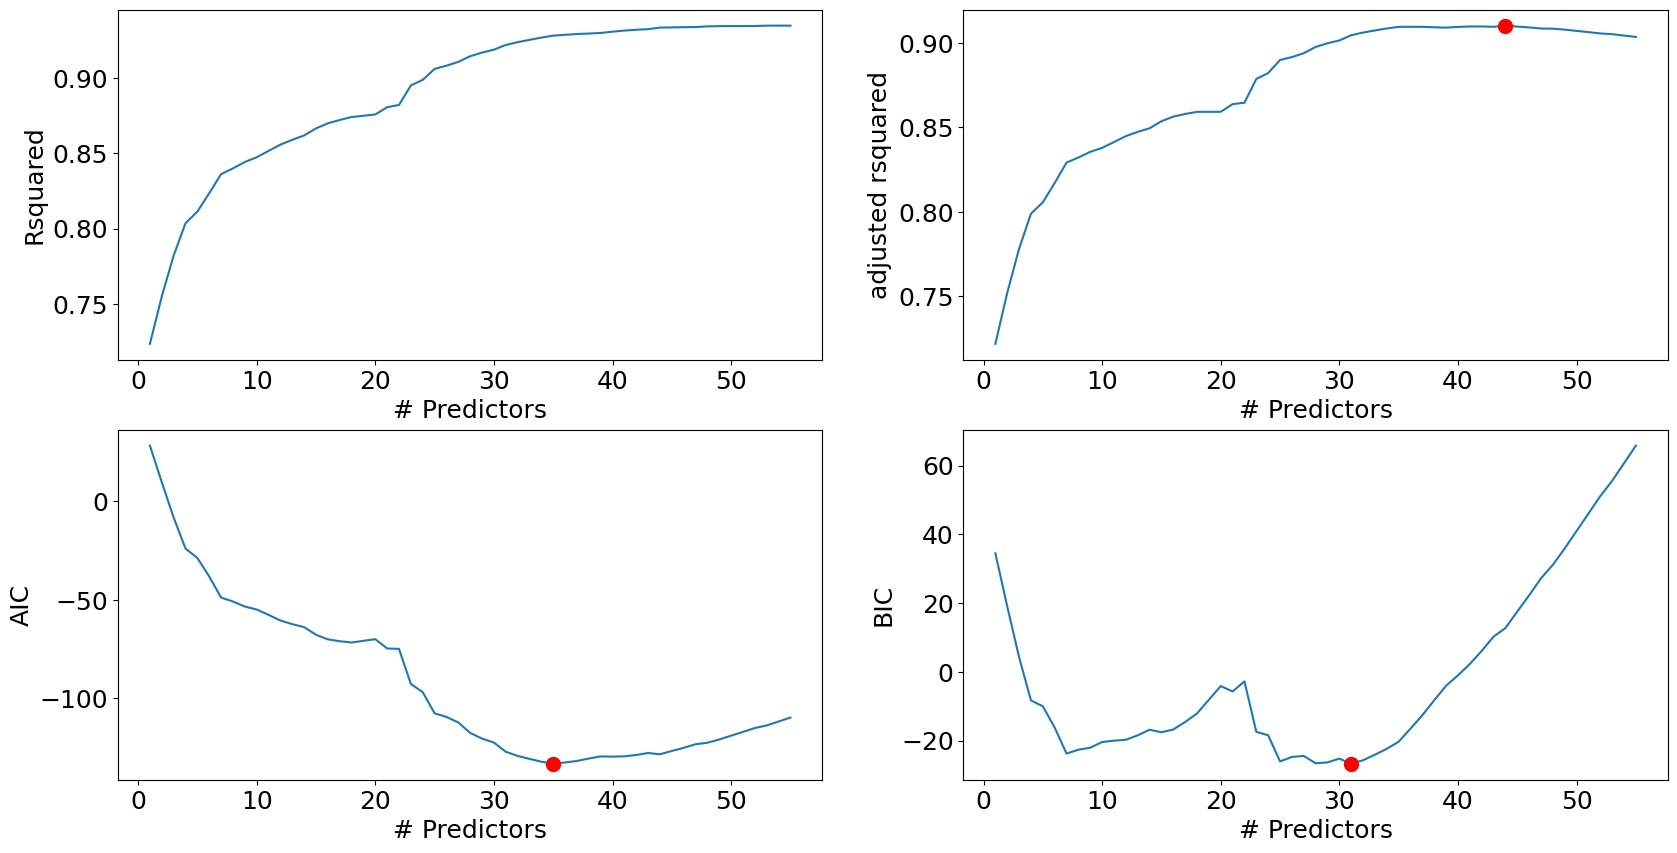

In [30]:
best_sub_plots()

In [31]:
# Optimizing for AIC because we want a more aggressive model

best_fwd_reg_model_AIC = models_best['model'][35]
best_fwd_reg_model_AIC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     49.56
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           7.26e-61
Time:                        19:18:39   Log-Likelihood:                 102.62
No. Observations:                 170   AIC:                            -133.2
Df Residuals:                     134   BIC:                            -20.34
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4329      0.970     -0.446      0.656      -2.351       1.485
RH_ISI               0.0100      0.002      4.709      0.000       0.006       0.014
ISI_FWI              0.0031      0.004      0.850      0.397      -0.004       0.010
ISI                 -2.4598      0.562     -4.380      0.000      -3.571      -1.349
DMC_ISI              0.0038      0.005      0.706      0.481      -0.007       0.014
Temperature_Ws       0.0021      0.002      1.214      0.227      -0.001       0.005
Rain_FWI            -0.0238      0.064     -0.372      0.710      -0.151       0.103
RH                  -0.0004      0.016     -0.026      0.979      -0.031       0.030
Rain_DC              0.0006      0.003      0.230      0.818      -0.005       0.006
Ws_FWI               0.0020      0.002      0.953      0.342      -0.002       0.006
Rain_Ws          -9.792e-05      0.002     -0.058      0.954      -0.003       0.003
Rain_ISI             0.1046      0.083      1.262      0.209      -0.059       0.268
FFMC                 0.0447      0.012      3.812      0.000       0.021       0.068
RH_DMC               0.0003      0.000      0.930      0.354      -0.000       0.001
Ws_FFMC             -0.0023      0.001     -3.767      0.000      -0.004      -0.001
Temperature         -0.0015      0.033     -0.044      0.965      -0.067       0.064
Temperature_Rain     0.0048      0.004      1.230      0.221      -0.003       0.013
Temperature_DC      -0.0028      0.001     -3.464      0.001      -0.004      -0.001
Ws_RH                0.0011      0.000      2.801      0.006       0.000       0.002
Temperature_BUI      0.0242      0.008      3.024      0.003       0.008       0.040
DMC_BUI              0.0019      0.000      4.014      0.000       0.001       0.003
DMC_FWI             -0.0032      0.003     -1.100      0.273      -0.009       0.003
FWI                  3.4068      0.410      8.304      0.000       2.595       4.218
FFMC_FWI            -0.0308      0.004     -7.891      0.000      -0.038      -0.023
FFMC_BUI            -0.0109      0.004     -3.073      0.003      -0.018      -0.004
FFMC_DC              0.0016      0.000      4.487      0.000       0.001       0.002
FFMC_ISI             0.0198      0.005      3.758      0.000       0.009       0.030
Temperature_DMC     -0.0180      0.007     -2.710      0.008      -0.031      -0.005
RH_FWI              -0.0075      0.002     -4.831      0.000      -0.011      -0.004
BUI_FWI             -0.0015      0.001     -1.182      0.239      -0.004       0.001
DC                  -0.0533      0.016     -3.317      0.001      -0.085      -0.022
RH_DC                0.0003   9.21e-05      3.507      0.001       0.000       0.001
Temperature_RH      -0.0008      0.000     -2.049      0.042      -0.002   -2.88e-05
FFMC_DMC             0.

Classification accuracy = 97.1%
Precision = 95.1%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 6.9%


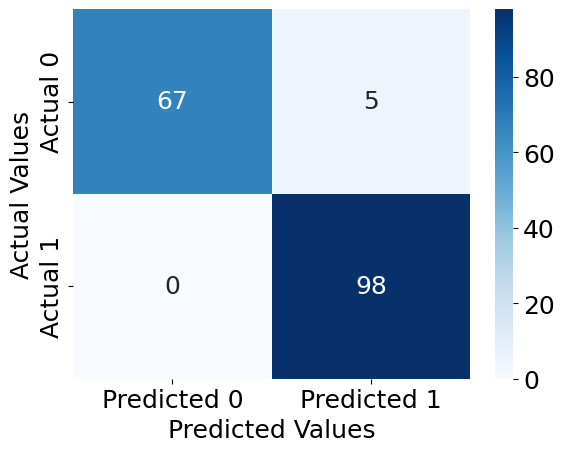

In [32]:
confusion_matrix_data(train, train.Classes, best_fwd_reg_model_AIC, 0.3)

Classification accuracy = 83.6%
Precision = 80.0%
TPR or Recall = 92.3%
FNR = 7.7%
FPR = 26.5%


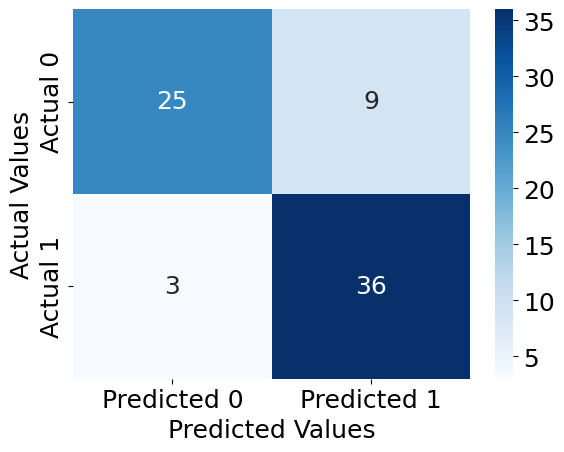

In [33]:
confusion_matrix_data(test, test.Classes, best_fwd_reg_model_AIC, 0.3)

## Forward Stepwise with just some of the variables as interaction terms

In [34]:
X = train[['FFMC', 'FWI', 'RH', 'BUI', 'Ws', 'Rain']]

X_backup = train[['FFMC', 'FWI', 'RH', 'BUI', 'Ws', 'Rain']]

for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]] # creating int. terms
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]] # creating int, terms
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # creating the same x

In [35]:
models_best = forward_selection()

Processed  21 models on 1 predictors in 0.05243992805480957 seconds.
Processed  20 models on 2 predictors in 0.04999184608459473 seconds.
Processed  19 models on 3 predictors in 0.056932926177978516 seconds.
Processed  18 models on 4 predictors in 0.06194305419921875 seconds.
Processed  17 models on 5 predictors in 0.06652426719665527 seconds.
Processed  16 models on 6 predictors in 0.07084918022155762 seconds.
Processed  15 models on 7 predictors in 0.07689476013183594 seconds.
Processed  14 models on 8 predictors in 0.07789111137390137 seconds.
Processed  13 models on 9 predictors in 0.0817420482635498 seconds.
Processed  12 models on 10 predictors in 0.07773113250732422 seconds.
Processed  11 models on 11 predictors in 0.08152508735656738 seconds.
Processed  10 models on 12 predictors in 0.07232475280761719 seconds.
Processed  9 models on 13 predictors in 0.0704202651977539 seconds.
Processed  8 models on 14 predictors in 0.06762290000915527 seconds.
Processed  7 models on 15 predic

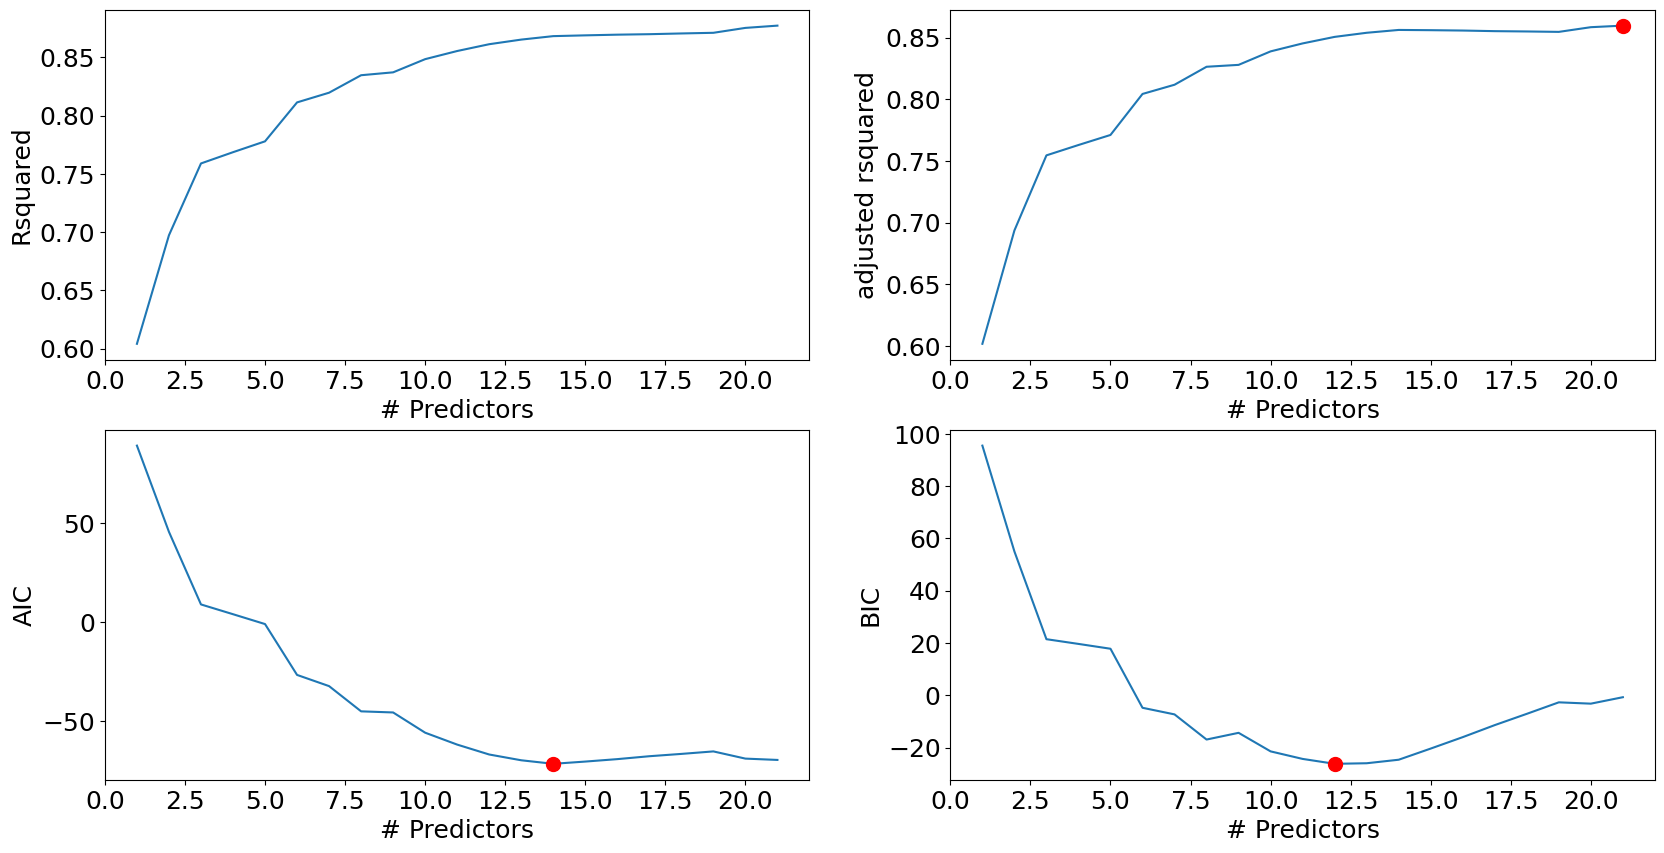

In [36]:
best_sub_plots()

In [37]:
best_fwd_reg_model_AIC_some = models_best['model'][13]
best_fwd_reg_model_AIC_some.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     77.01
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           6.68e-61
Time:                        19:18:41   Log-Likelihood:                 48.950
No. Observations:                 170   AIC:                            -69.90
Df Residuals:                     156   BIC:                            -26.00
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6334      0.982     -3.701      0.000      -5.573      -1.694
FFMC           0.0610      0.012      4.975      0.000       0.037       0.085
FWI_RH        -0.0009      0.000     -1.782      0.077      -0.002    9.35e-05
BUI_Ws         0.0004      0.001      0.761      0.448      -0.001       0.001
FWI_Rain       0.0365      0.010      3.770      0.000       0.017       0.056
RH             0.0277      0.013      2.077      0.039       0.001       0.054
FFMC_RH       -0.0004      0.000     -2.619      0.010      -0.001   -9.62e-05
FFMC_FWI      -0.0132      0.002     -6.526      0.000      -0.017      -0.009
FWI            1.3313      0.211      6.313      0.000       0.915       1.748
FFMC_Ws       -0.0013      0.000     -4.341      0.000      -0.002      -0.001
BUI           -0.1546      0.035     -4.409      0.000      -0.224      -0.085
RH_Ws          0.0009      0.000      2.995      0.003       0.000       0.001
FFMC_BUI       0.0012      0.000      3.343      0.001       0.000       0.002
RH_BUI         0.0003      0.000      2.140      0.034    2.53e-05       0.001
==============================================================================
Omnibus:                        7.989   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               13.875
Skew:                          -0.144   Prob(JB):                     0.000971
Kurtosis:                       4.370   Cond. No.                     3.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 96.5%
Precision = 94.2%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 8.3%


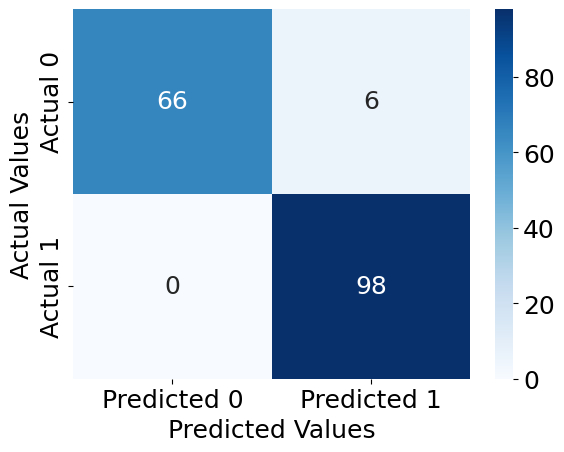

In [38]:
confusion_matrix_data(train, train.Classes, best_fwd_reg_model_AIC_some, 0.3)

Classification accuracy = 86.3%
Precision = 79.6%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 29.4%


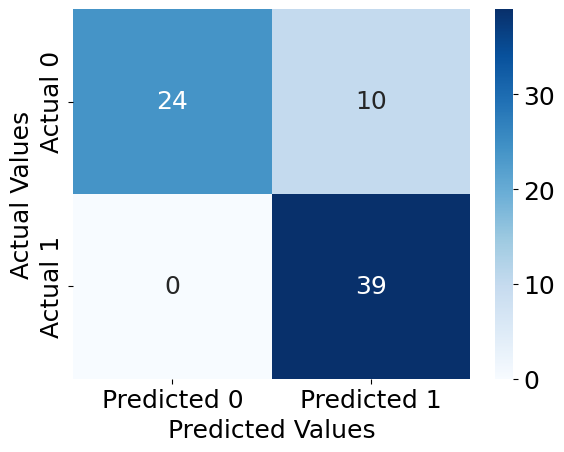

In [39]:
confusion_matrix_data(test, test.Classes, best_fwd_reg_model_AIC_some, 0.3)

### Trying all of the variables

In [40]:
logit_model = smf.logit(formula = 'Classes~Temperature+Rain+Ws+RH+FFMC+DMC+DC+ISI+BUI+FWI', data = train).fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35


In [41]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Classes   No. Observations:                  170
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                           10
Date:                Thu, 09 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        19:18:41   Log-Likelihood:            -4.1286e-05
converged:                       True   LL-Null:                       -115.84
Covariance Type:            nonrobust   LLR p-value:                 3.821e-44
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.5916    1.9e+05  -2.42e-05      1.000   -3.73e+05    3.73e+05
Temperature   -13.6444   1.44e+04     -0.001      0.999   -2.83e+04    2.83e+04
Rain           12.4549   1.08e+04      0.001    

Classification accuracy = 100.0%
Precision = 100.0%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 0.0%


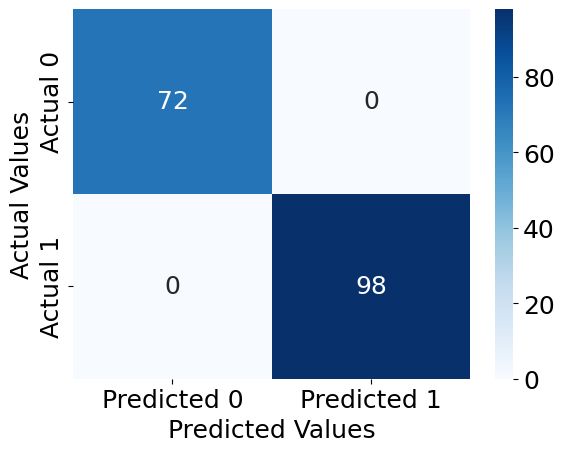

In [42]:
confusion_matrix_data(train, train.Classes, logit_model, 0.3)

Classification accuracy = 90.4%
Precision = 94.4%
TPR or Recall = 87.2%
FNR = 12.8%
FPR = 5.9%


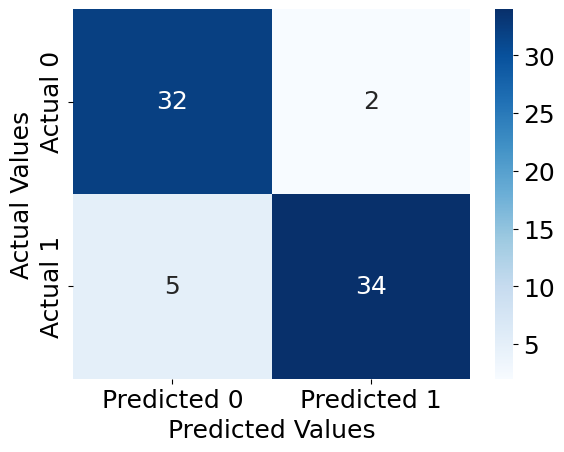

In [43]:
confusion_matrix_data(test, test.Classes, logit_model, 0.3)

### No Multi-collinearity model (jk lol)

In [44]:
logit_model = smf.logit(formula = 'Classes~Temperature+RH+Ws+Rain+FFMC', data = train).fit()

         Current function value: 0.000021
         Iterations: 35


In [45]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Classes   No. Observations:                  170
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        19:18:41   Log-Likelihood:             -0.0035943
converged:                      False   LL-Null:                       -115.84
Covariance Type:            nonrobust   LLR p-value:                 4.689e-48
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1040.4846   2708.190     -0.384      0.701   -6348.439    4267.470
Temperature    -6.5868     25.026     -0.263      0.792     -55.638      42.464
RH             -0.3247      2.129     -0.153    

Classification accuracy = 100.0%
Precision = 100.0%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 0.0%


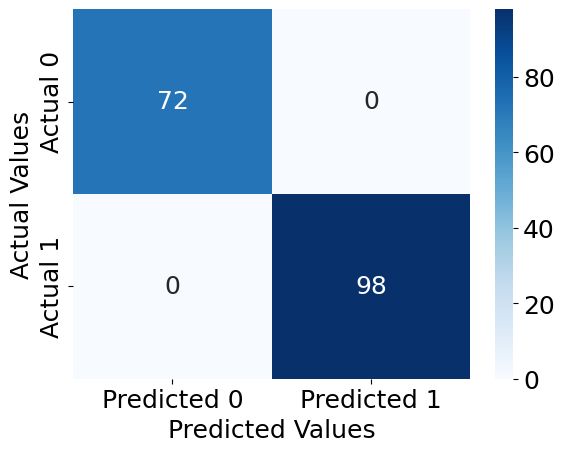

In [46]:
confusion_matrix_data(train, train.Classes, logit_model, 0.3)

Classification accuracy = 93.2%
Precision = 92.5%
TPR or Recall = 94.9%
FNR = 5.1%
FPR = 8.8%


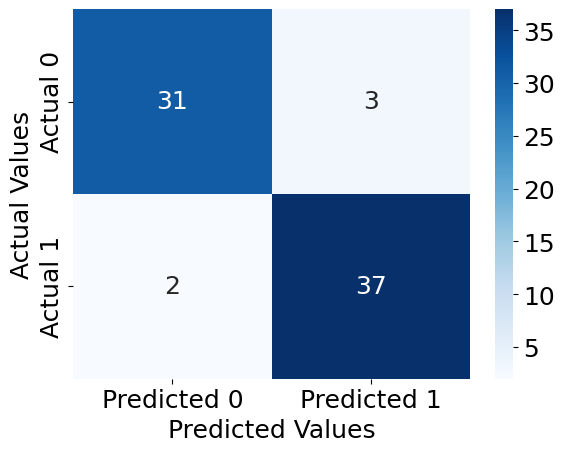

In [47]:
confusion_matrix_data(test, test.Classes, logit_model, 0.3)

### Third Level Interactions

In [48]:
X = train[['FFMC', 'FWI', 'RH', 'BUI', 'Ws', 'Rain']]

X_backup = train[['FFMC', 'FWI', 'RH', 'BUI', 'Ws', 'Rain']]

for combo in itertools.combinations(X_backup.columns, 3):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]] # creating int. terms
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]] # creating int, terms
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # creating the same x

In [49]:
models_best = forward_selection()

Processed  26 models on 1 predictors in 0.05235791206359863 seconds.
Processed  25 models on 2 predictors in 0.07146382331848145 seconds.
Processed  24 models on 3 predictors in 0.0692288875579834 seconds.
Processed  23 models on 4 predictors in 0.07328009605407715 seconds.
Processed  22 models on 5 predictors in 0.08138775825500488 seconds.
Processed  21 models on 6 predictors in 0.09151196479797363 seconds.
Processed  20 models on 7 predictors in 0.09770512580871582 seconds.
Processed  19 models on 8 predictors in 0.10330820083618164 seconds.
Processed  18 models on 9 predictors in 0.10885977745056152 seconds.
Processed  17 models on 10 predictors in 0.09831809997558594 seconds.
Processed  16 models on 11 predictors in 0.10234785079956055 seconds.
Processed  15 models on 12 predictors in 0.11693096160888672 seconds.
Processed  14 models on 13 predictors in 0.11278223991394043 seconds.
Processed  13 models on 14 predictors in 0.12356996536254883 seconds.
Processed  12 models on 15 pre

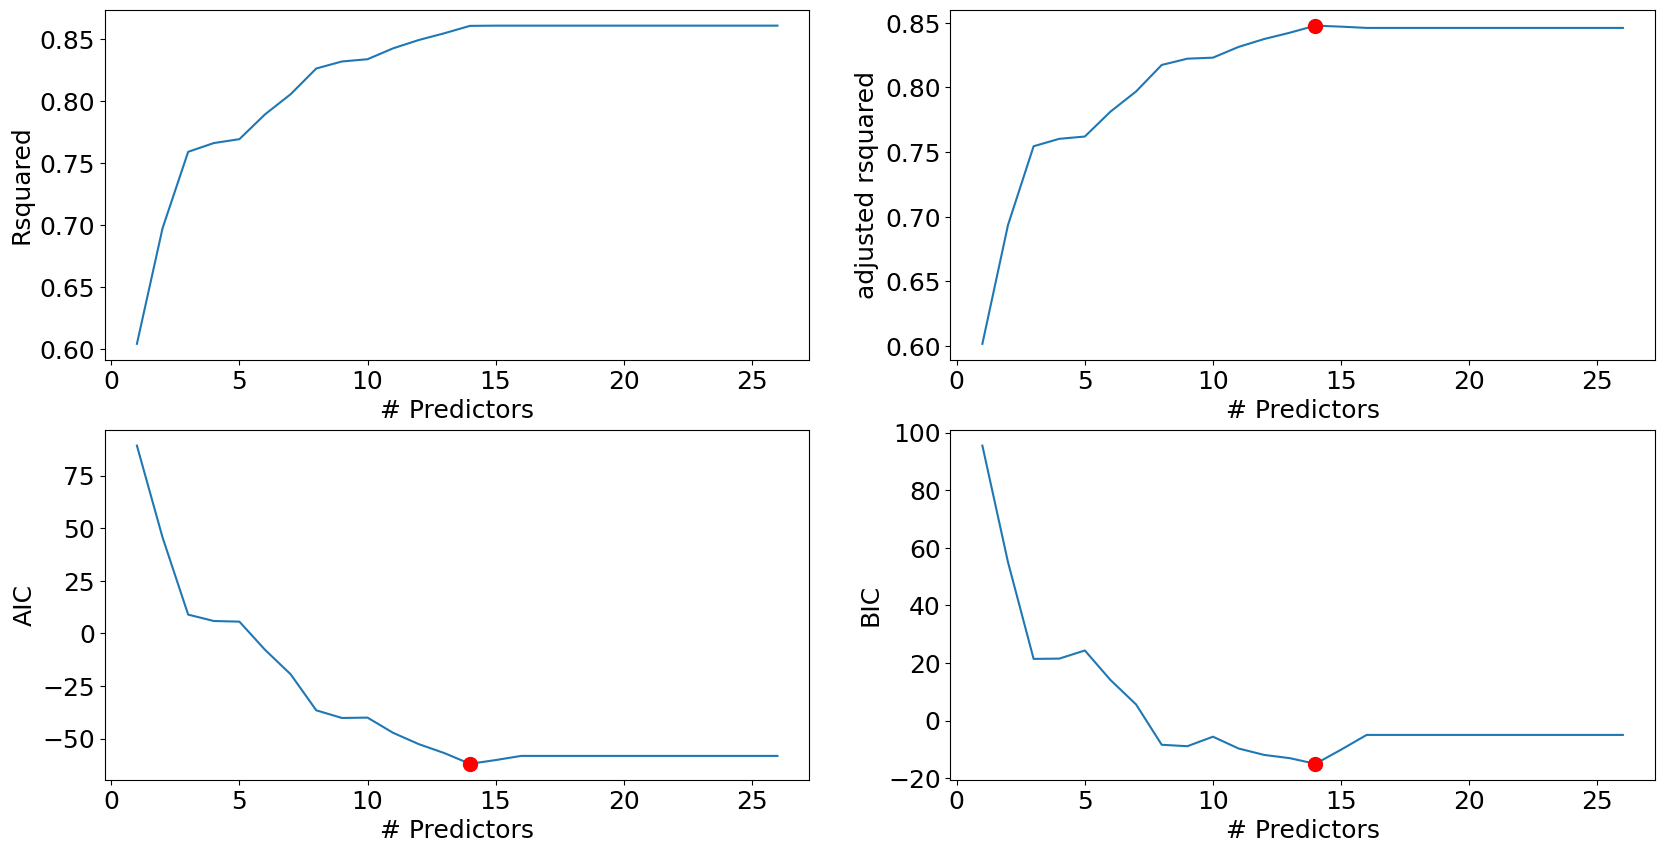

In [50]:
best_sub_plots()

In [51]:
best_fwd_reg_model_AIC_some_3 = models_best['model'][14]
best_fwd_reg_model_AIC_some_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     68.25
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           8.51e-59
Time:                        19:18:45   Log-Likelihood:                 46.004
No. Observations:                 170   AIC:                            -62.01
Df Residuals:                     155   BIC:                            -14.97
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.4814      1.199     -2.069      0.040      -4.850      -0.113
FFMC            0.0524      0.013      3.981      0.000       0.026       0.078
FWI_RH_BUI     -0.0013      0.001     -2.565      0.011      -0.002      -0.000
BUI_Ws_Rain    -0.0004      0.001     -0.767      0.444      -0.002       0.001
FWI_BUI_Ws      0.0003      0.000      1.150      0.252      -0.000       0.001
FWI             1.5338      0.238      6.444      0.000       1.064       2.004
FFMC_FWI_RH    -0.0153      0.002     -6.633      0.000      -0.020      -0.011
RH              0.0256      0.015      1.728      0.086      -0.004       0.055
FFMC_RH_BUI    -0.0005      0.000     -3.296      0.001      -0.001      -0.000
Rain            0.0206      0.009      2.354      0.020       0.003       0.038
Ws             -0.1262      0.034     -3.738      0.000      -0.193      -0.060
BUI            -0.1496      0.037     -4.033      0.000      -0.223      -0.076
RH_Ws_Rain      0.0015      0.000      3.018      0.003       0.001       0.002
RH_BUI_Ws       0.0005      0.000      2.650      0.009       0.000       0.001
FFMC_BUI_Ws     0.0011      0.000      2.570      0.011       0.000       0.002
==============================================================================
Omnibus:                        8.413   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               15.910
Skew:                          -0.101   Prob(JB):                     0.000351
Kurtosis:                       4.485   Cond. No.                     4.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 96.5%
Precision = 94.2%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 8.3%


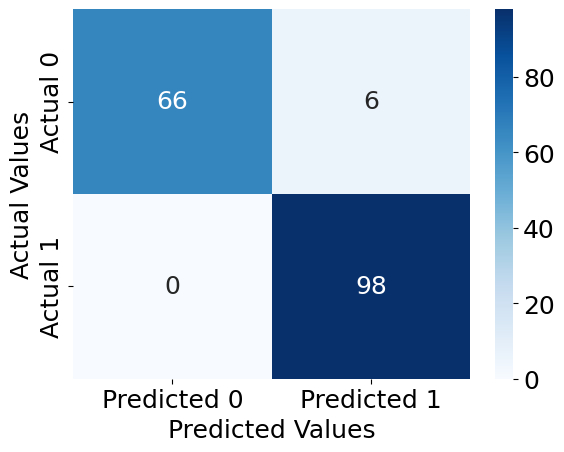

In [52]:
confusion_matrix_data(train, train.Classes, best_fwd_reg_model_AIC_some_3, 0.3)

Classification accuracy = 84.9%
Precision = 79.2%
TPR or Recall = 97.4%
FNR = 2.6%
FPR = 29.4%


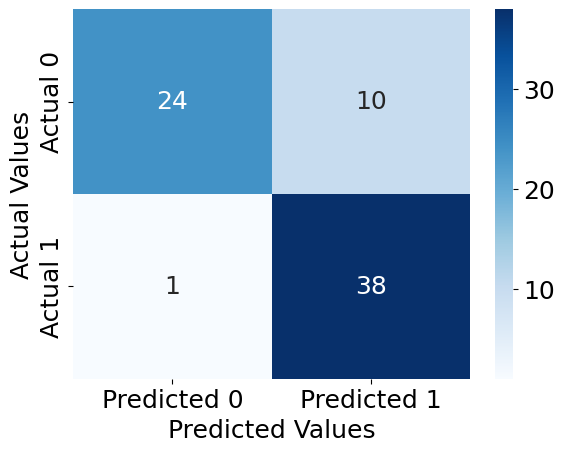

In [53]:
confusion_matrix_data(test, test.Classes, best_fwd_reg_model_AIC_some_3, 0.3)

## Binning to see if transformations are necessary among variables

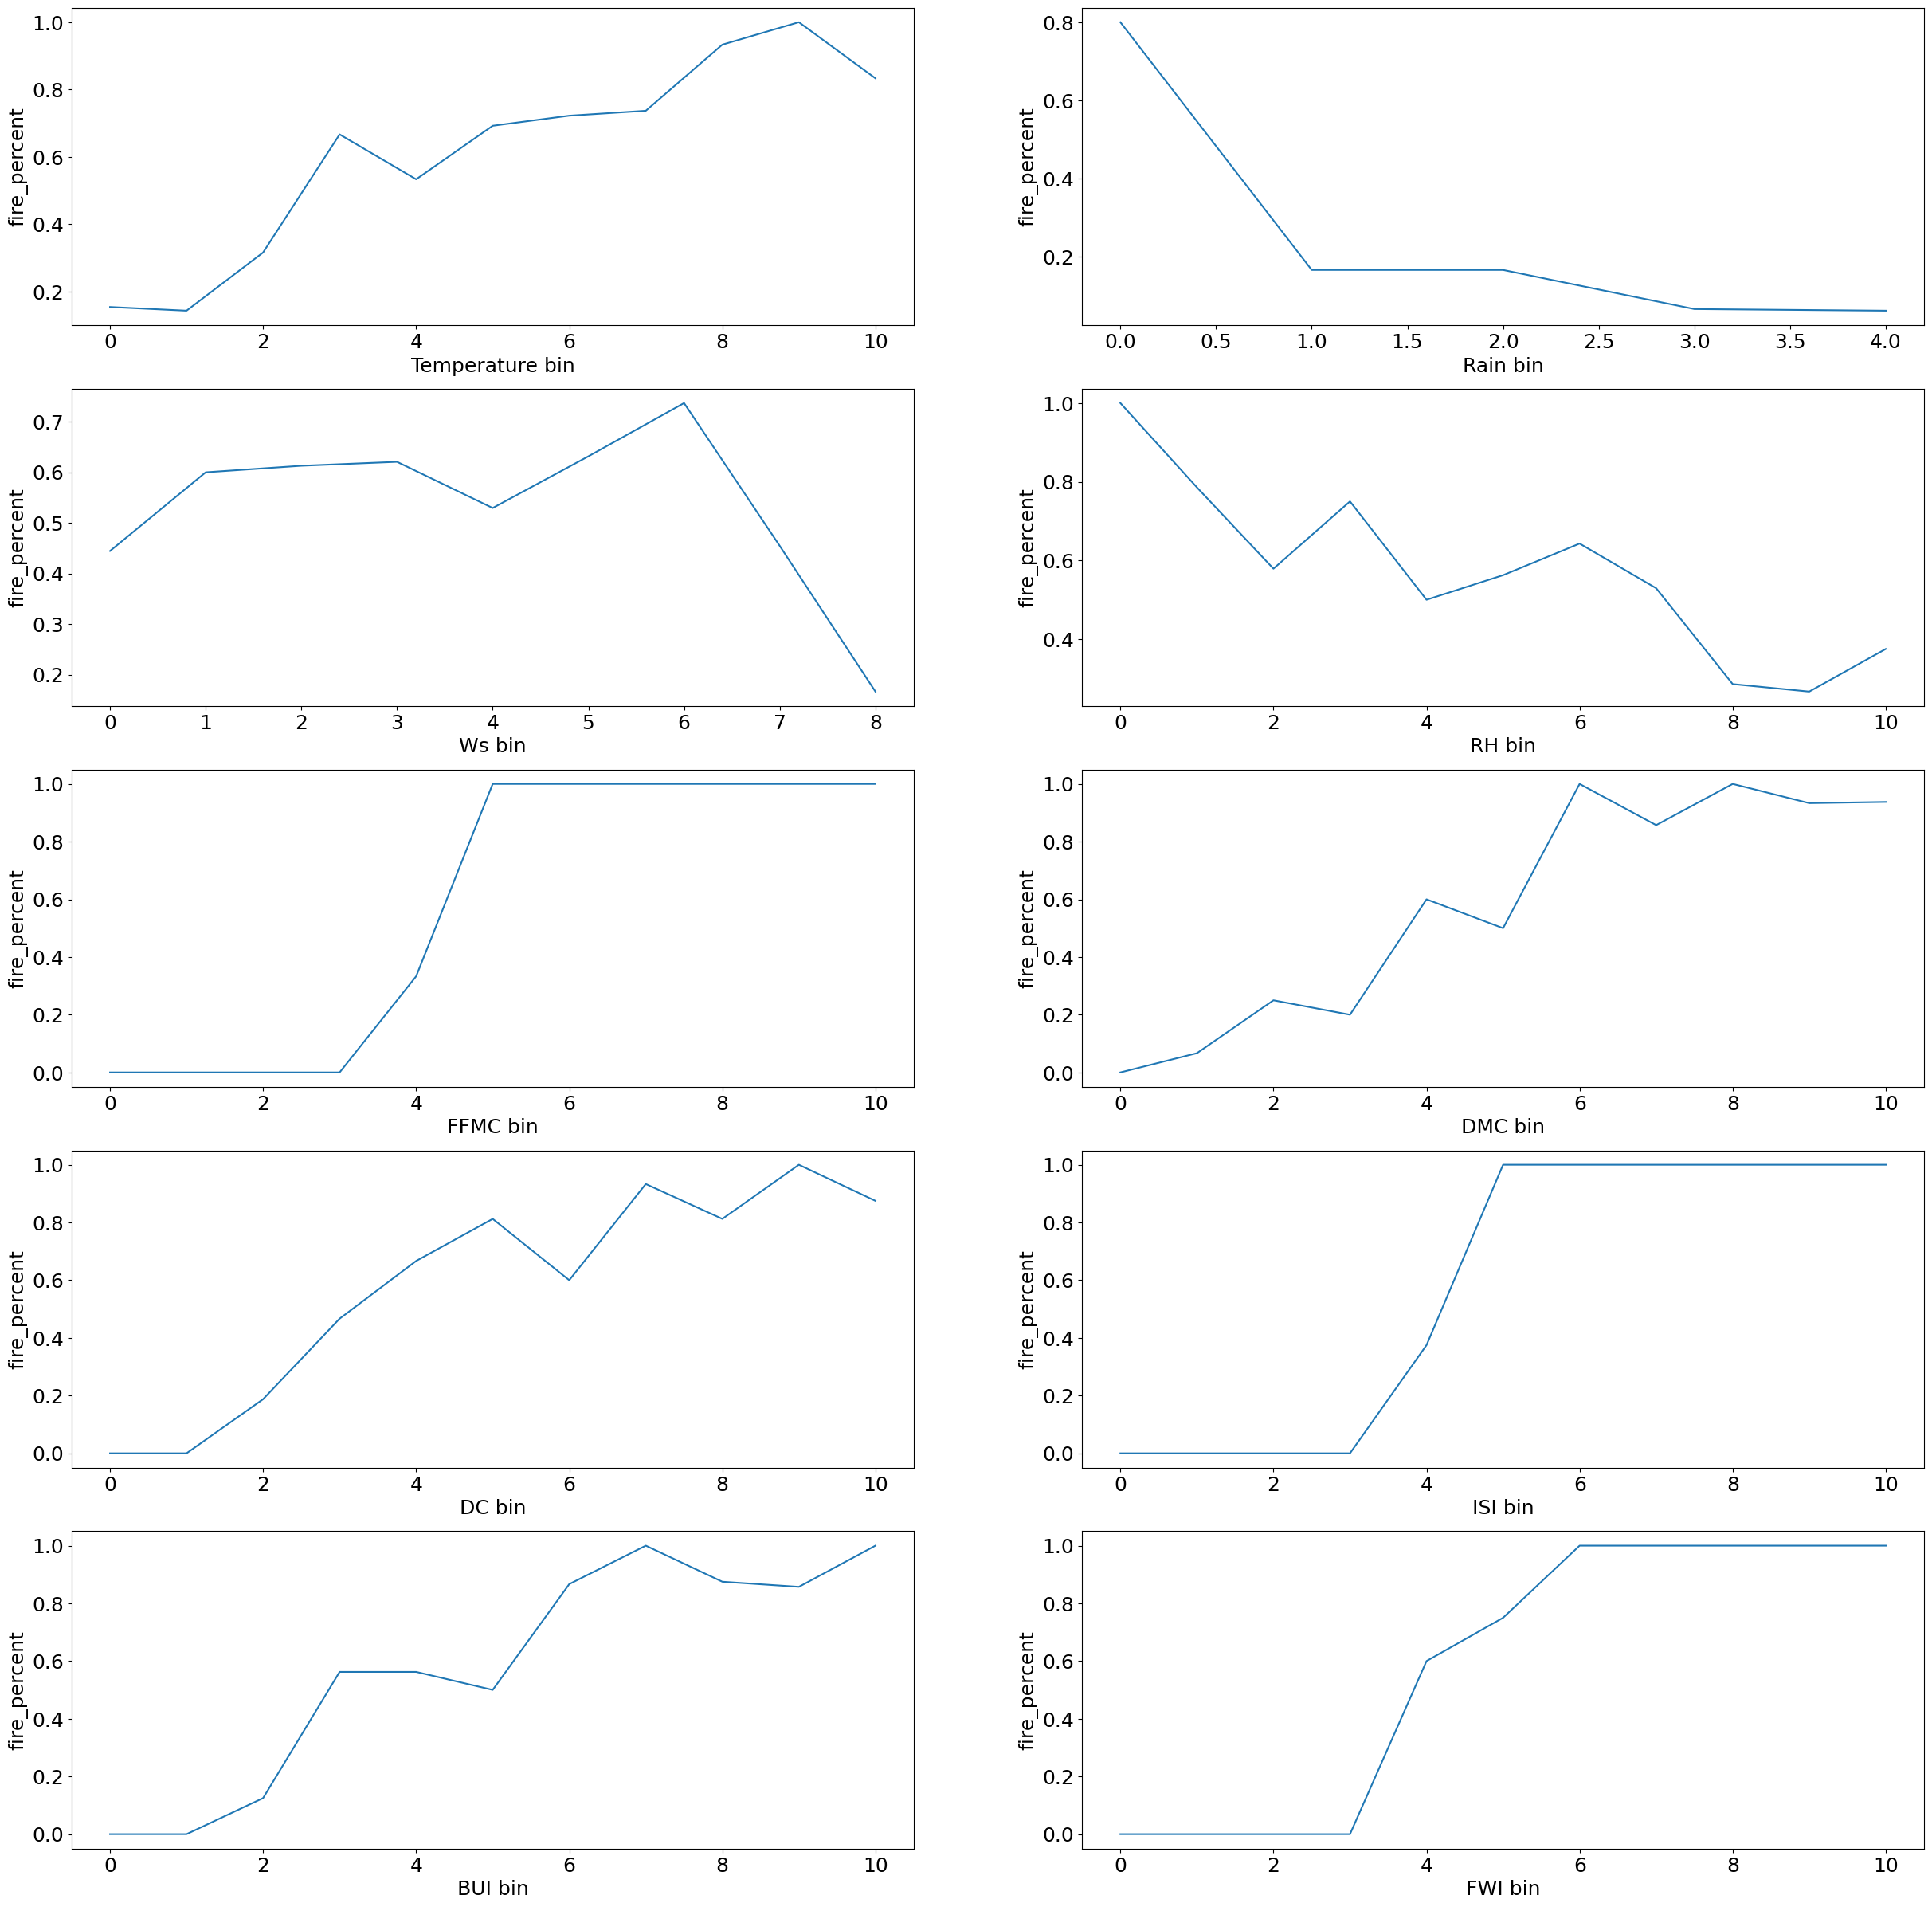

In [54]:
variables = ['Temperature','Rain','Ws','RH','FFMC','DMC','DC','ISI','BUI','FWI']

fig, axes = plt.subplots(5,2,figsize=(30,30))

var = 0

for i in range(5):
    for j in range(2):
        
        # Binning var
        binned = pd.qcut(train[variables[var]], 11, retbins = True, duplicates = 'drop')
        train['Binned'] = binned[0]
        
        data = train.groupby('Binned')['Classes'].agg([('fire_percent','mean'),('nobs','count')]).reset_index(drop=False)
        
        label = variables[var] + ' bin'
        axes[i,j].set_xlabel(label)
        
        
        sns.lineplot(ax = axes[i,j], x = data.index, y= data['fire_percent'])
        
        var += 1
        

No transformations necessary

Final Models (optimizing for recall):

1. best_fwd_reg_model_AIC_some
2. best_fwd_reg_model_AIC
3. best_subset_model_no_interaction
4. logit_model 

# Model Evaluation (Abenezer)

- ROC-AUC
- Confusion Matrix
- Precision, recall, that sort of thing
- 

0.9796380090497738


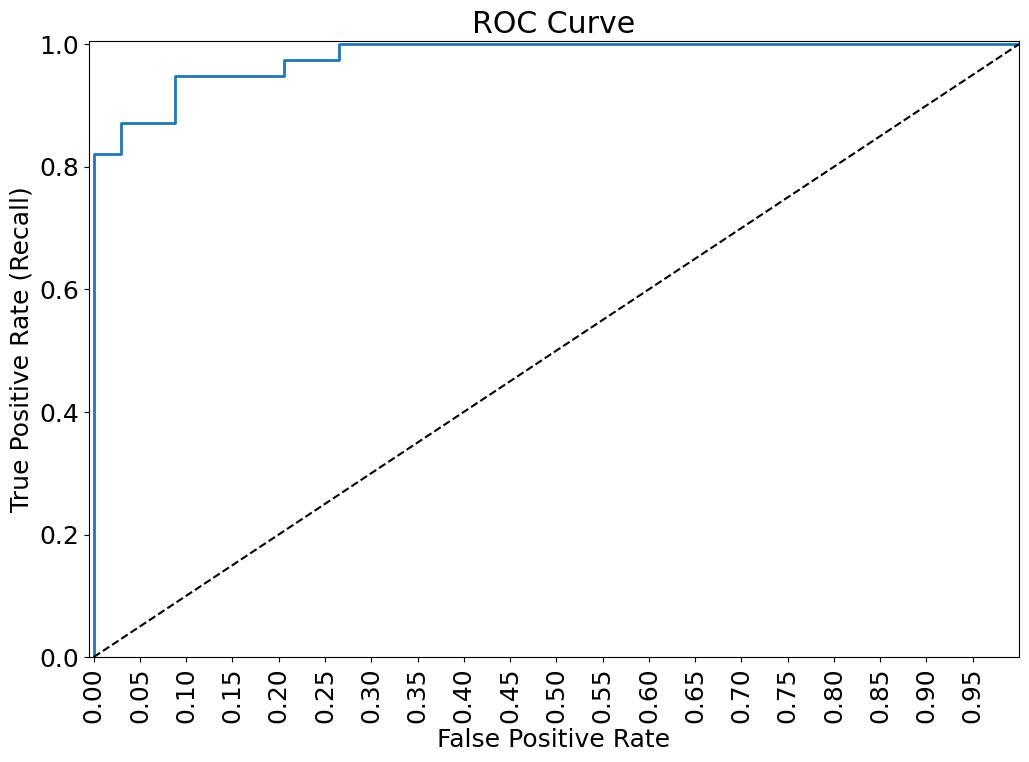

In [55]:
from sklearn.metrics import roc_curve, auc
y=test.Classes
ypred = best_fwd_reg_model_AIC_some.predict(test)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)